In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt
from pybats.analysis import analysis
from pybats.point_forecast import median

df = pd.read_csv('out_clean.csv')

# Changing the datatype
# df["Month"] = pd.to_datetime(df['Month'], format='%Y-%m')

# Setting the Date as index
df = df.set_index('Date')

Y = df['Total Generation (KWH)'].values

In [49]:
k = 1 # forecasting one step ahead
forecast_start = 0 # starting forecast at time step 0
forecast_end = len(df)-1 # ending forecast at the same time our data ends

mod, samples = analysis(
    Y,
    family="poisson", #the family of the distribution to be used
    forecast_start=forecast_start,
    forecast_end=forecast_end,
    k=k,
    nsamps=60, # number of samples we draw for each month
    prior_length=6, # number of points that define the prior distribution
    rho=.9, # random effect extension
    deltrend=0.5, # discount factor for trend component
    delregn=0.9 # discount factor for regression component
)

forecast = median(samples)
forecast

array([[   0. ],
       [   0. ],
       [   0. ],
       ...,
       [4150.5],
       [3914.5],
       [3995. ]])

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import math

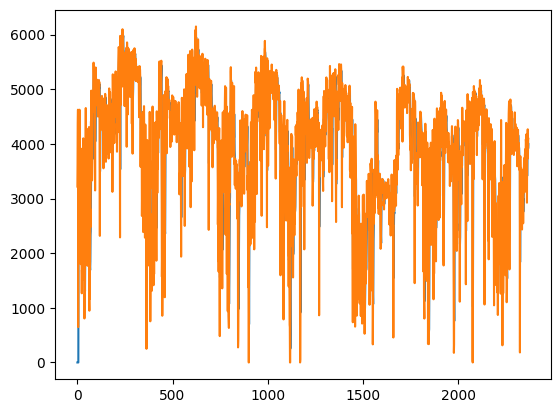

In [51]:
plt.figure()
plt.plot(forecast)
# plt.figure()
plt.plot(Y)

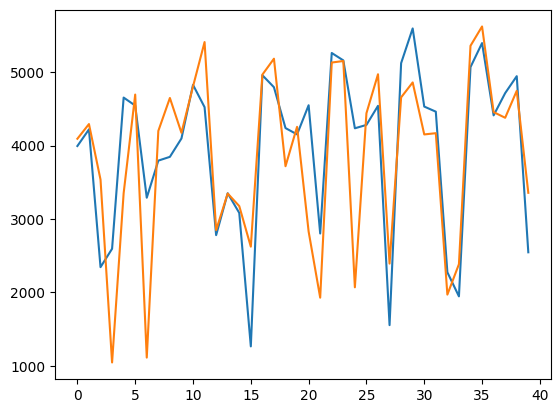

In [62]:
plt.figure()
plt.plot(forecast[::-60])
# plt.figure()
plt.plot(Y[::-60])

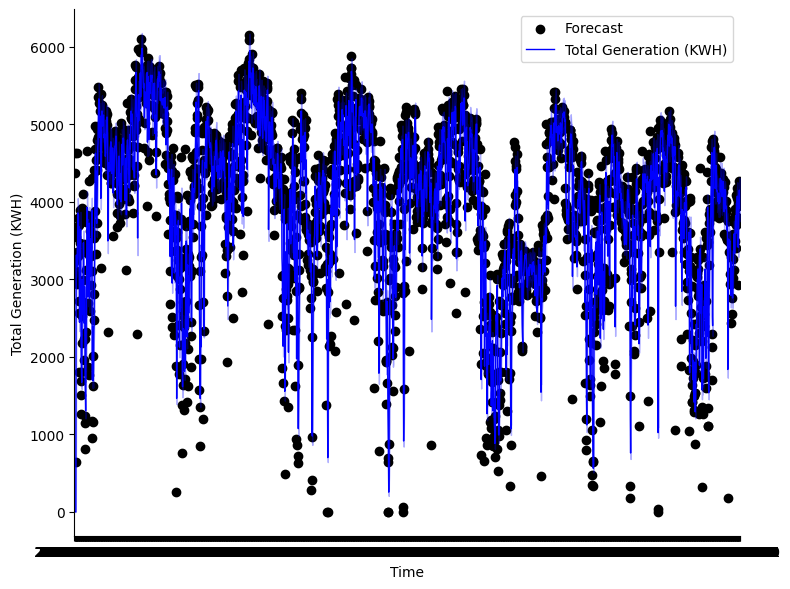

In [52]:
from pybats.plot import plot_data_forecast
from pybats.plot import ax_style
fig, ax = plt.subplots(1,1, figsize=(8, 6))   
ax = plot_data_forecast(fig, ax, Y, forecast, samples,
                        dates=df.index)
ax = ax_style(ax, ylabel='Total Generation (KWH)', xlabel='Time',
              legend=['Forecast', 'Total Generation (KWH)'])


In [53]:
act = np.array(Y)
act

array([3218.  , 3633.  , 4377.  , ..., 3732.03, 4063.88, 4093.9 ])

In [54]:
fct = np.ndarray.flatten(forecast)
fct

array([   0. ,    0. ,    0. , ..., 4150.5, 3914.5, 3995. ])

In [55]:
mse = np.square(np.subtract(act,fct)).mean()
mse

559217.166591438

In [56]:
math.sqrt(mse)

747.808241858458

In [57]:
Y[1]

3633.0

In [58]:
len(Y)

2370

In [59]:
len(forecast)

2370

In [60]:
len(df)

2370